# NLP Project

# Business Use-Case
**Improve Movie Audience Satisfaction and Box Office Performance through Sentiment Analysis of IMDB Reviews.**


### Objective: 
Use sentiment analysis on IMDB movie reviews to understand audience sentiments and identify factors influencing positive and negative opinions. This analysis will enable movie studios to make data-driven decisions, enhancing audience satisfaction, and maximizing box office performance.

# Importing Libraries

In [123]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
# nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Reading the Data 

In [124]:
df = pd.read_csv('Review.csv')
# Check first five rows of the data
df.head()

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...


In [125]:
df.tail()

,sentiment,review
9995,Positive,I first saw this movie back in the early'90's ...
9996,Positive,"NYC, 2022: The Greenhouse effect, vanished oce..."
9997,Positive,"Those individuals familiar with Asian cinema, ..."
9998,Positive,"The kids, aged 7 to 14, got such a huge kick o..."
9999,Positive,I so love this movie! The animation is great (...


## Understanding theData

In [126]:
# check the dimensions of the data 
df.shape

(10000, 2)

In [127]:
# check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [128]:
# statistical summary of the data 
df.describe()

,sentiment,review
count,10000,10000
unique,2,9990
top,Negative,This show comes up with interesting locations ...
freq,5081,3


In [129]:
# check nulls
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [130]:
# drop duplicate rows from the data 
df.drop_duplicates(inplace=True)
df.shape

(9990, 2)

In [131]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative    5073
Positive    4917
Name: sentiment, dtype: int64

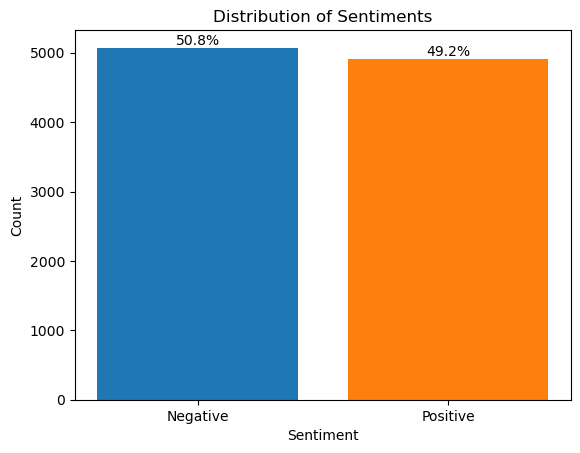

In [132]:
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add percentages on top of each bar
total = sum(sentiment_counts.values)
for i, count in enumerate(sentiment_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference**

- The distribution of sentiments in our data is almost equally distributed. 

- Therefore, we can say that we have a balanced data 

## Text preprocessing

In [133]:
# Remove all the special characters
stop_words = set(stopwords.words('english'))
# Define a function to clean the text using regular expressions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    return text

In [134]:
lemmatizer = WordNetLemmatizer()

In [135]:
# Clean the 'review' column and apply the clean text function here
df['review'] = df['review'].apply(clean_text)
df['review'].head() 

0    background knowledge movie bought sounded cool...
1    huge jane austen fan ordered movie amazonuk co...
2    nothing say wow anyone actually somebody sneak...
3    like jane austin novels love pride prejudice s...
4    day age incredible special movie effects one s...
Name: review, dtype: object

In [136]:
df['review'][0]

'background knowledge movie bought sounded cool ive wanting see really kickbutt viking movie awhile alas film looking hoped best instead delivered boring nordic soapopera seemed drag long despite 84 minute running time films premise intriguing enough viking warlord defies god odin enraged curses warlords son named barek death rebirth berserker barek guy forced live enraged insane violent lifetime lifetime movie filmed competently enough rich cinematography quasigood performances actors found bored questioning dribble would end filmmakers chance make something rather entertaining semiunique dropped ball perhaps couldve improved cheap exploitation tactics thrown gratuitous nudity lots gore mean talking berserkers arent vikings supposed bad enough raping pillaging arent berserkers supposed even extreme unless youre fan young restless etc fact insane berserker likes self torture id probably steer clear drab piece celluloid'

## WordCloud

### WordCloud for whole data 

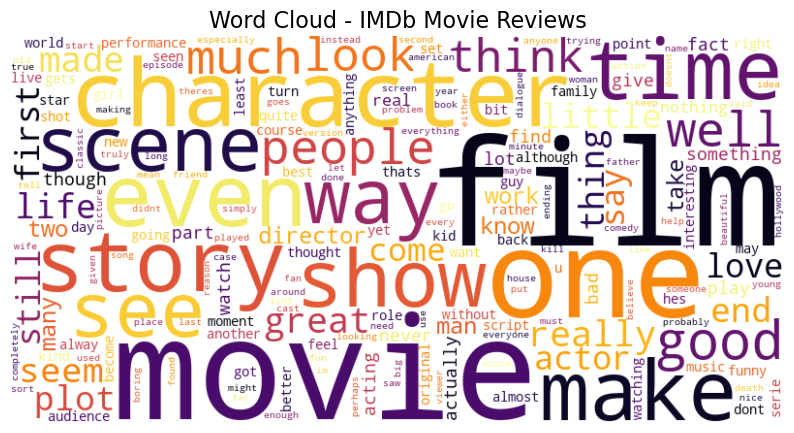

In [137]:
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud with a custom color map
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - IMDb Movie Reviews', fontsize=16)
plt.show()

In [138]:
df.sentiment = df.sentiment.astype('object')

In [139]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

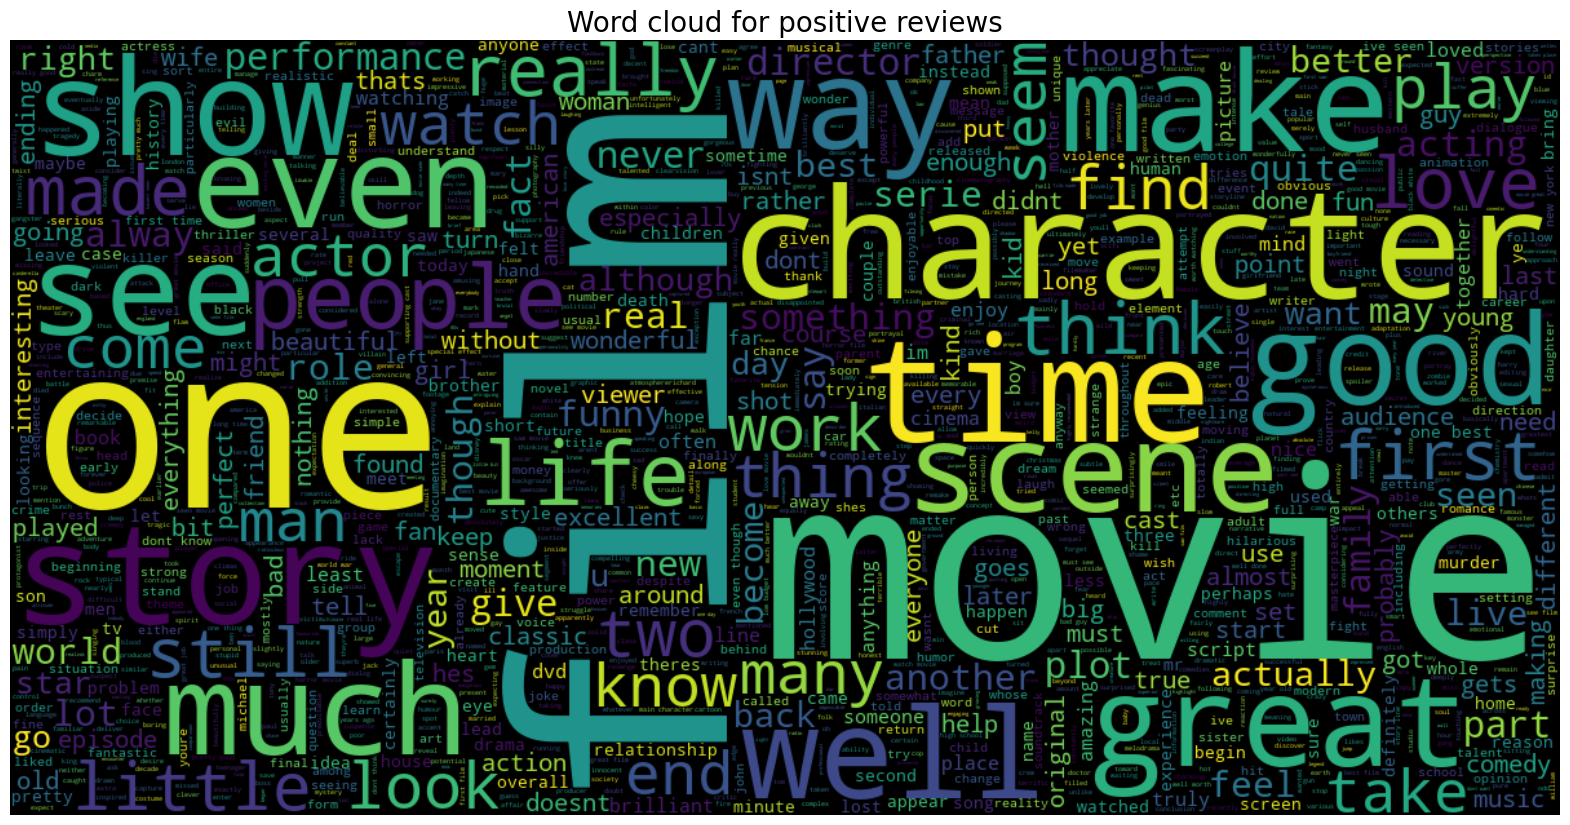

In [140]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

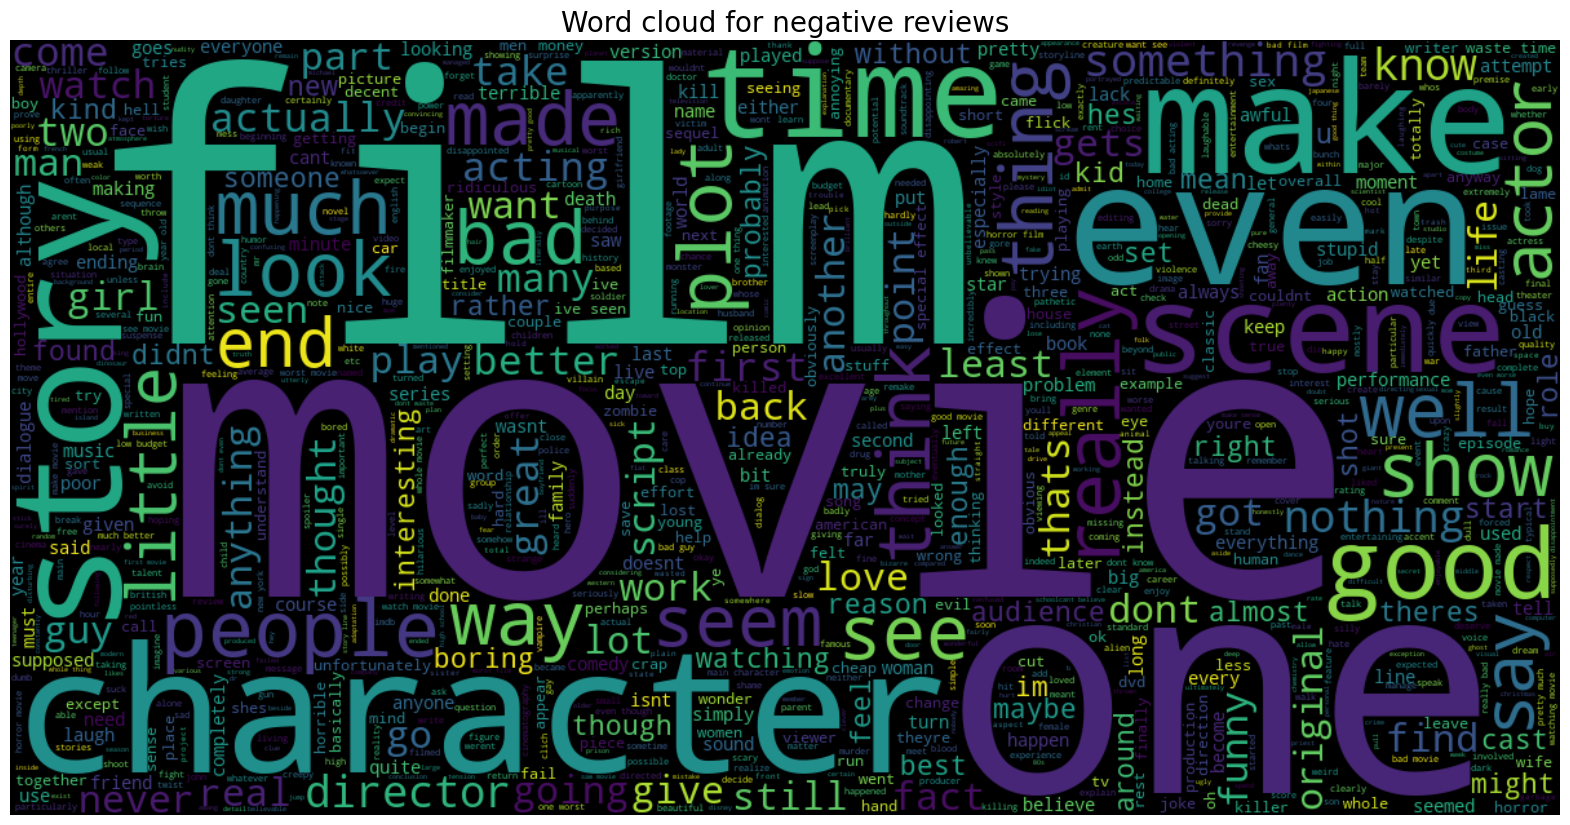

In [141]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

### Removing white spaces 

In [142]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['background', 'knowledge', 'movie', 'bought', 'sounded']

**Note :** These are the first five words of the first review

### N_gram plots ( most frequent n words)

This function will give you the plots of n cosecutive most frequent words used together in a sequence 

In [143]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

### Unigram analysis (most frequent one word)

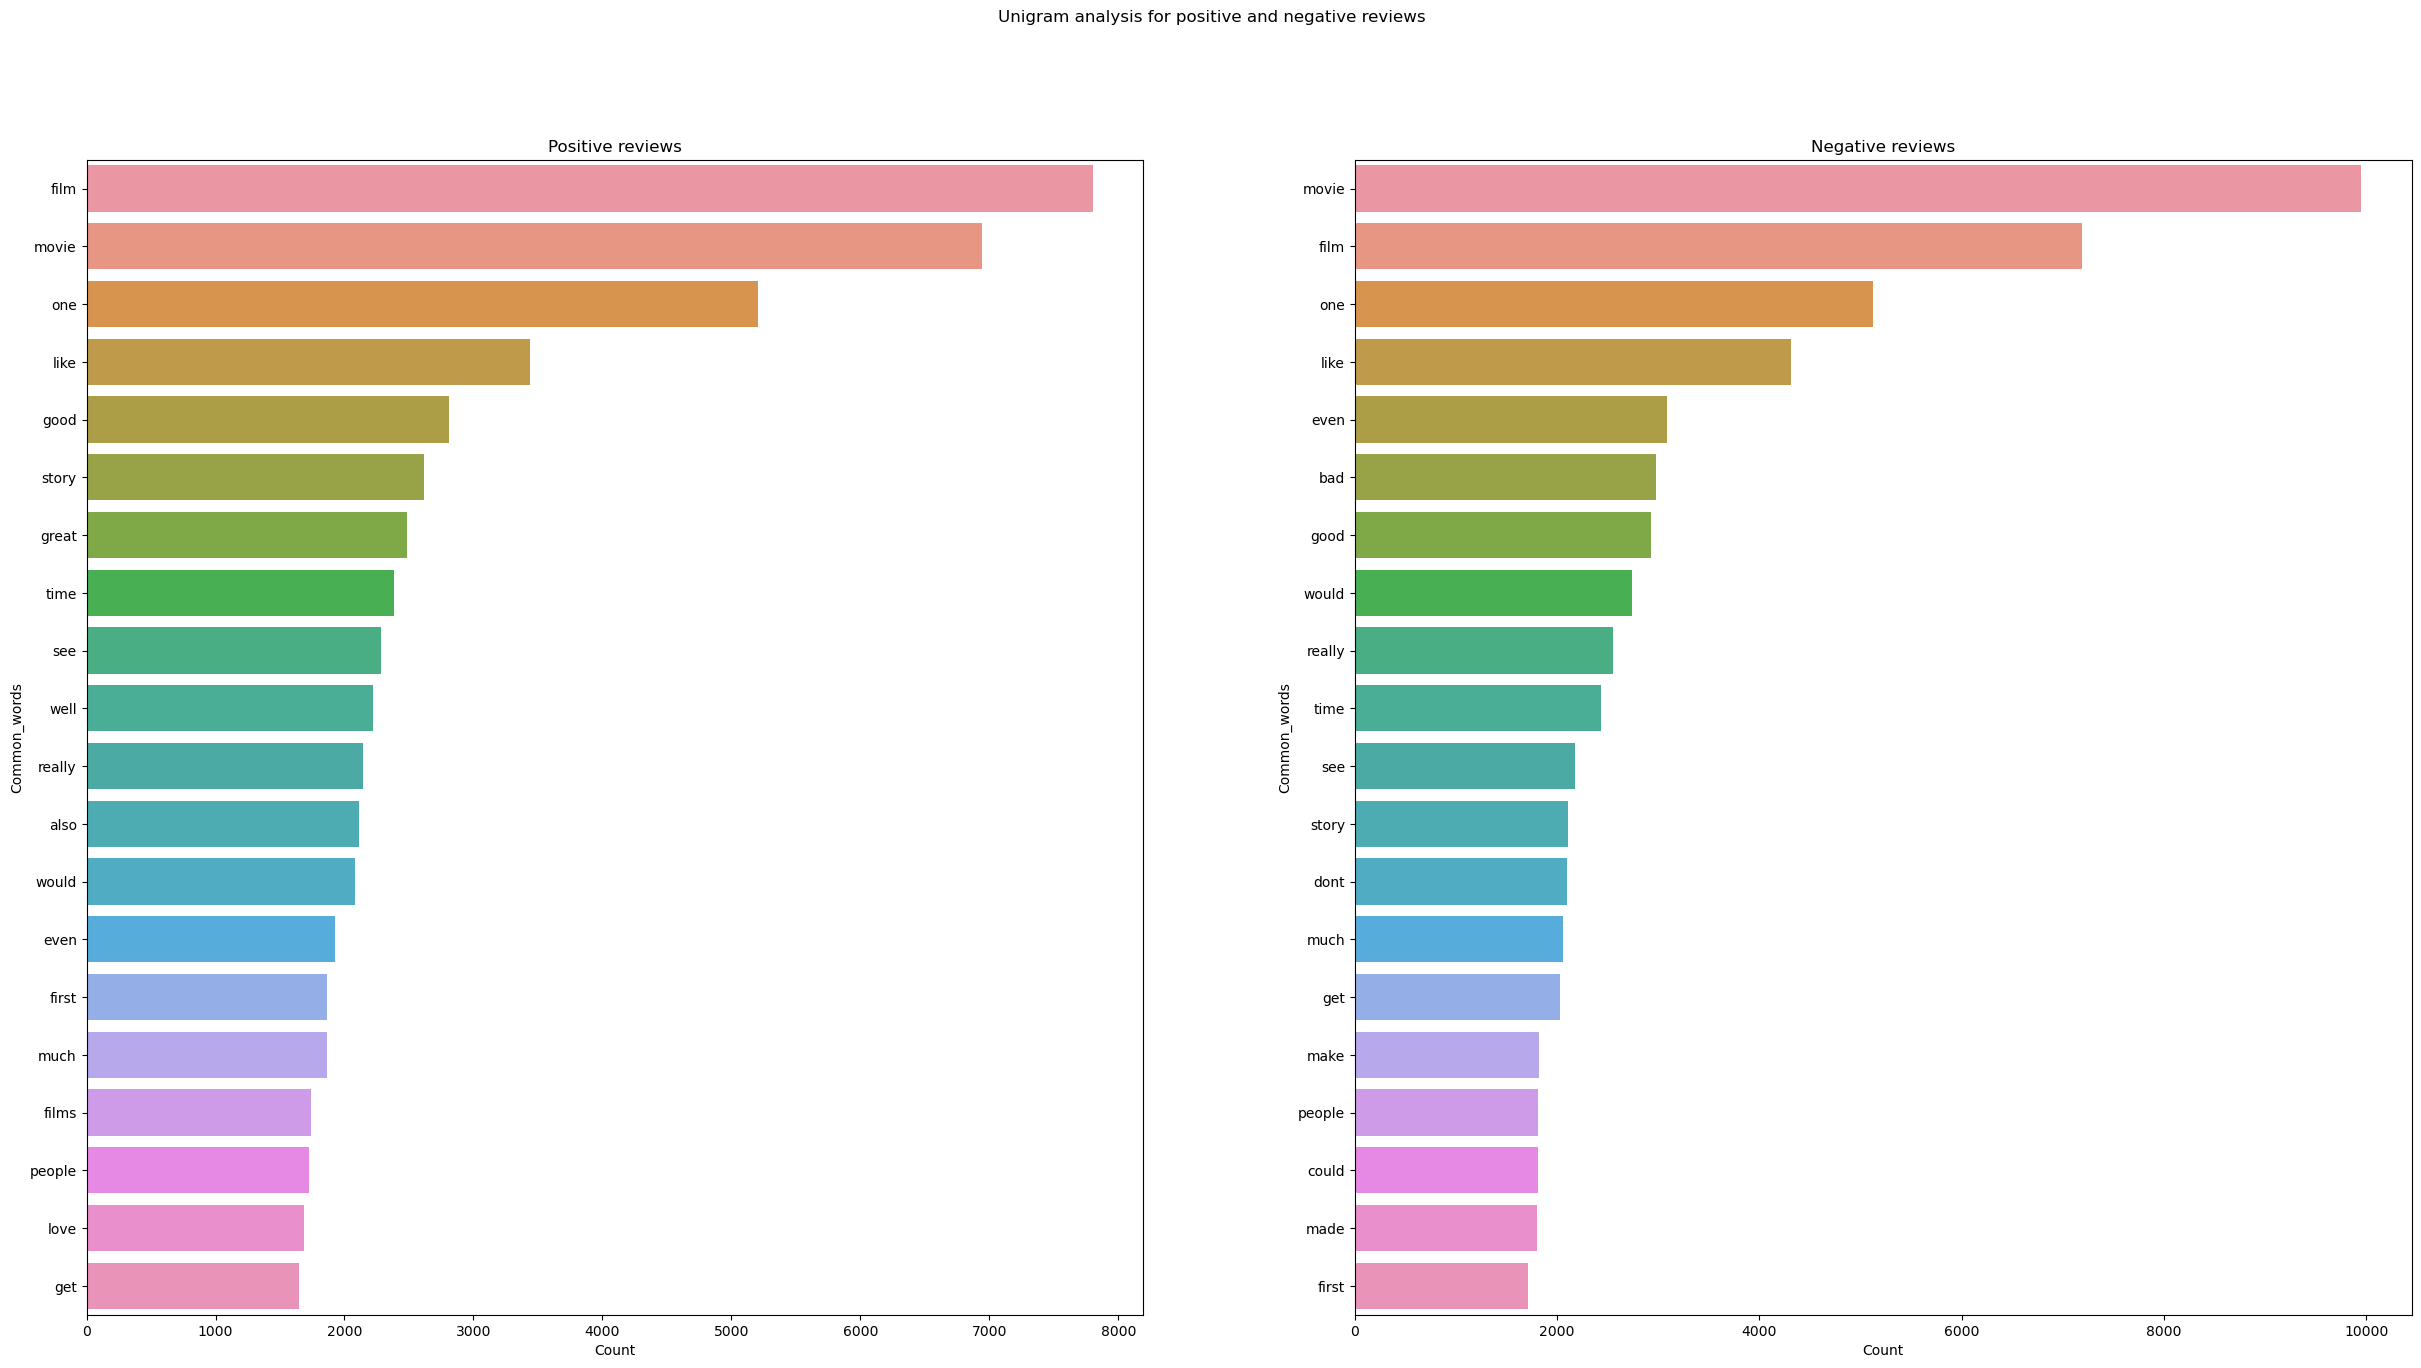

In [144]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


### Bigram analysis (most frequent two words)

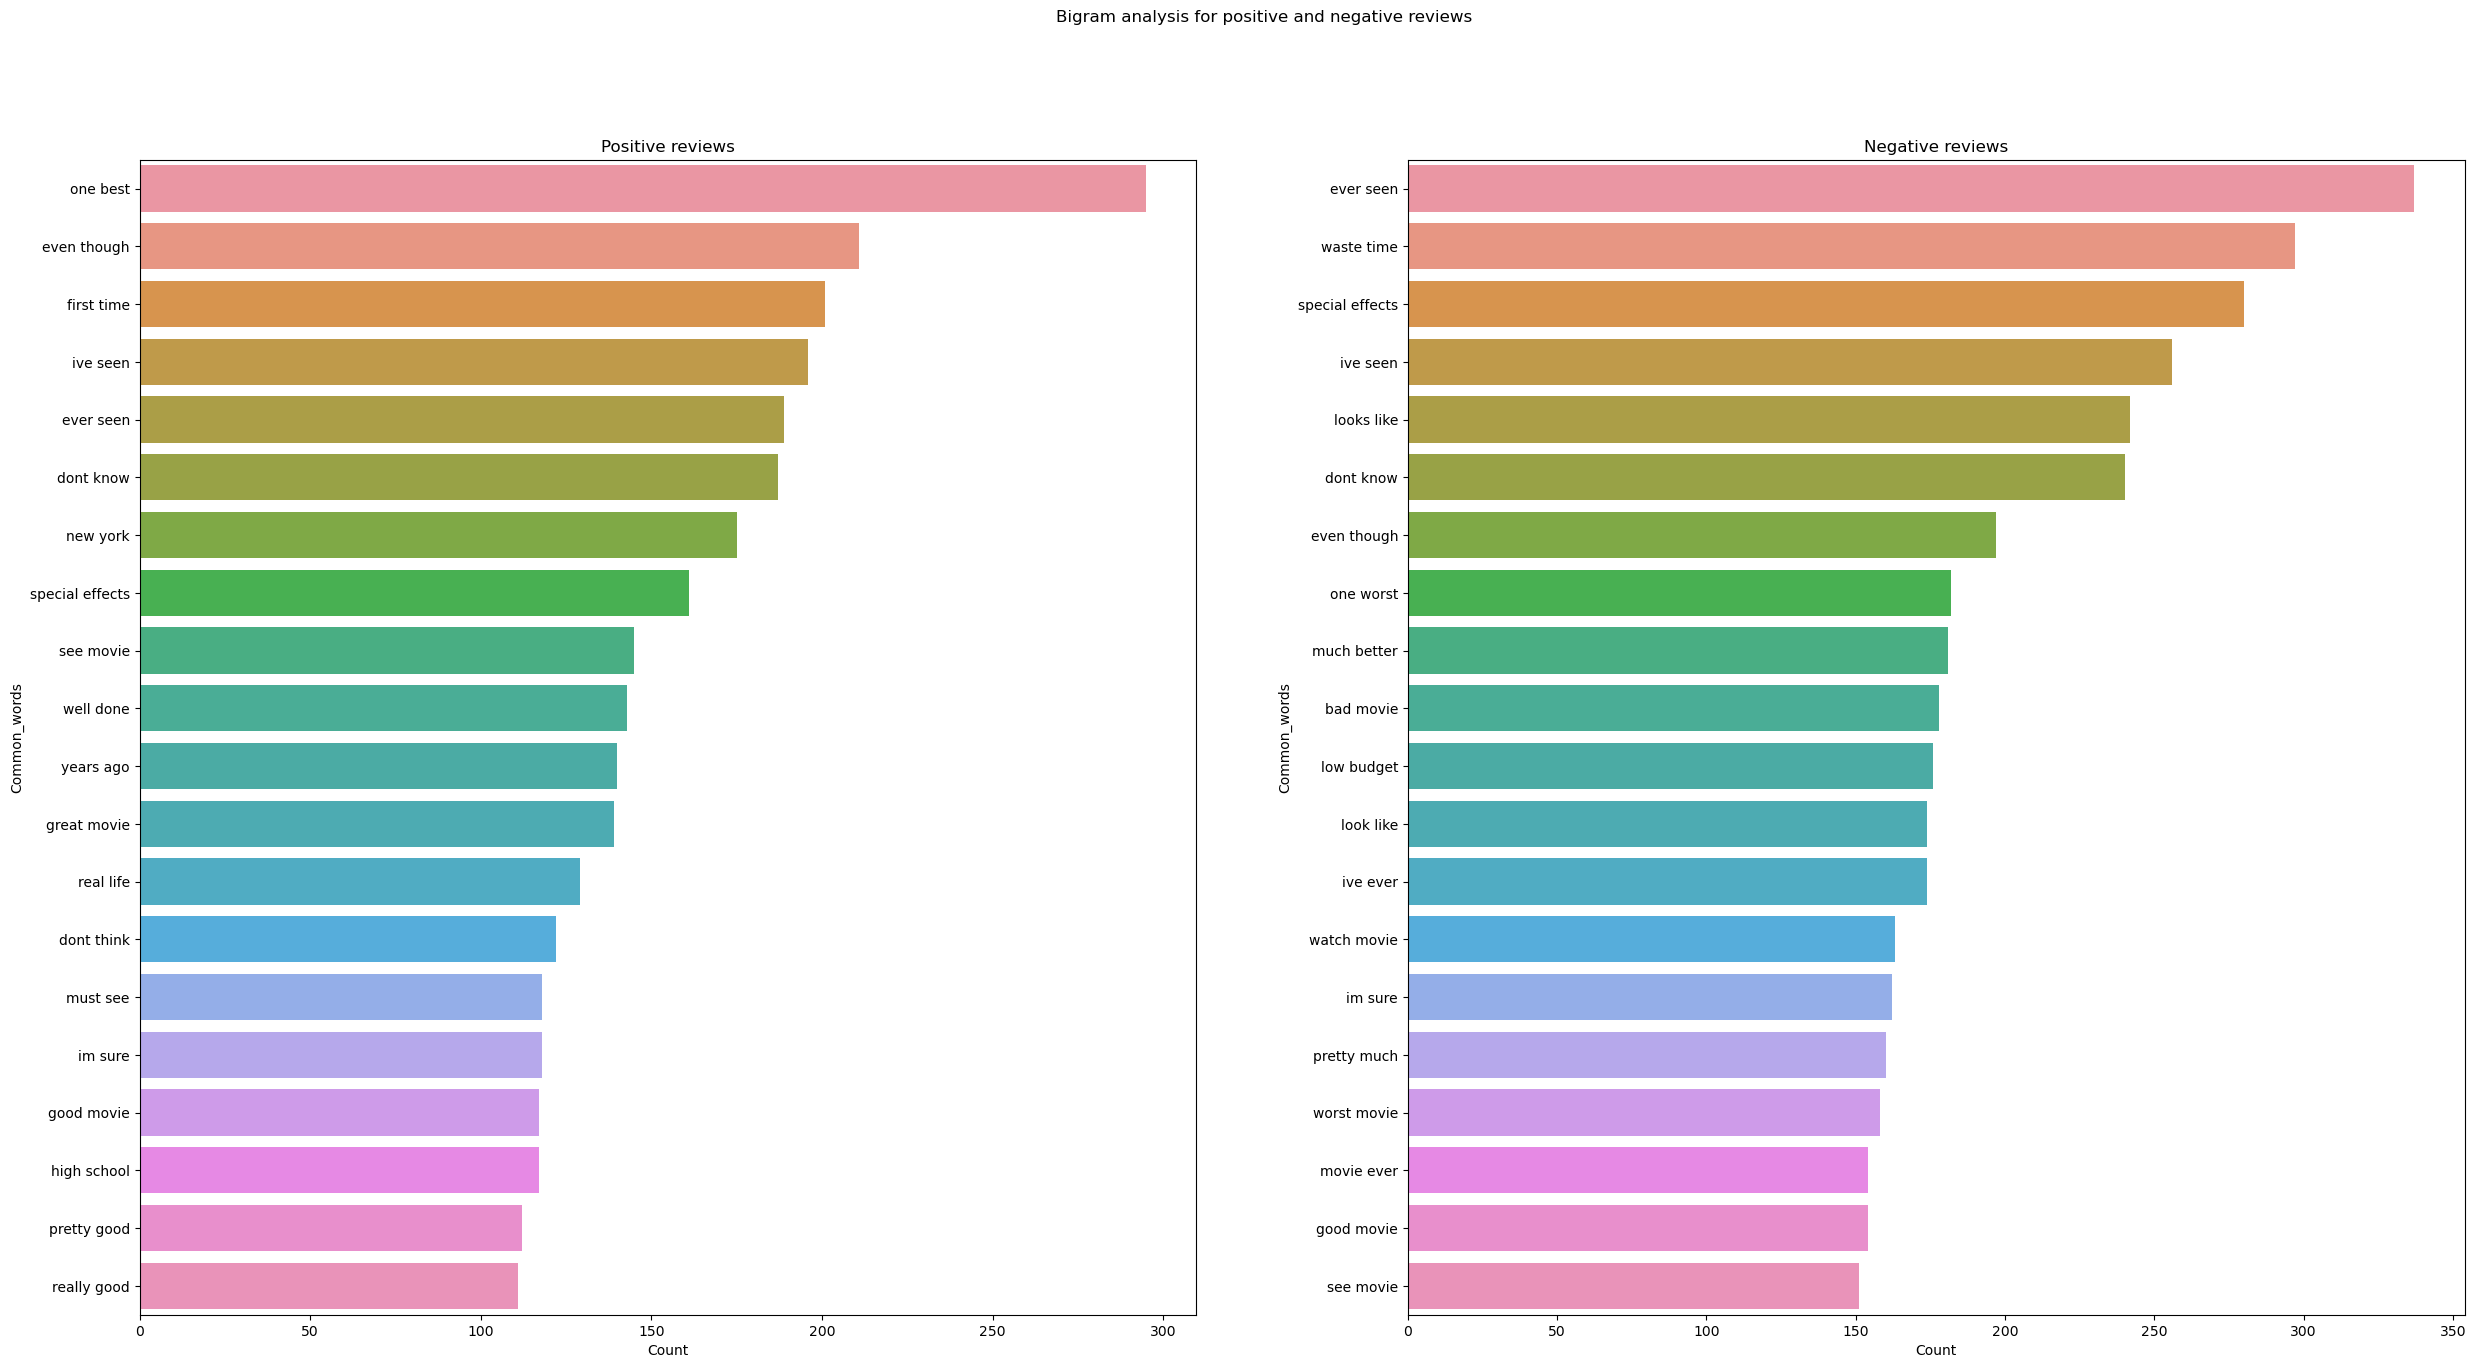

In [145]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

### trigram analysis (most frequent three word)

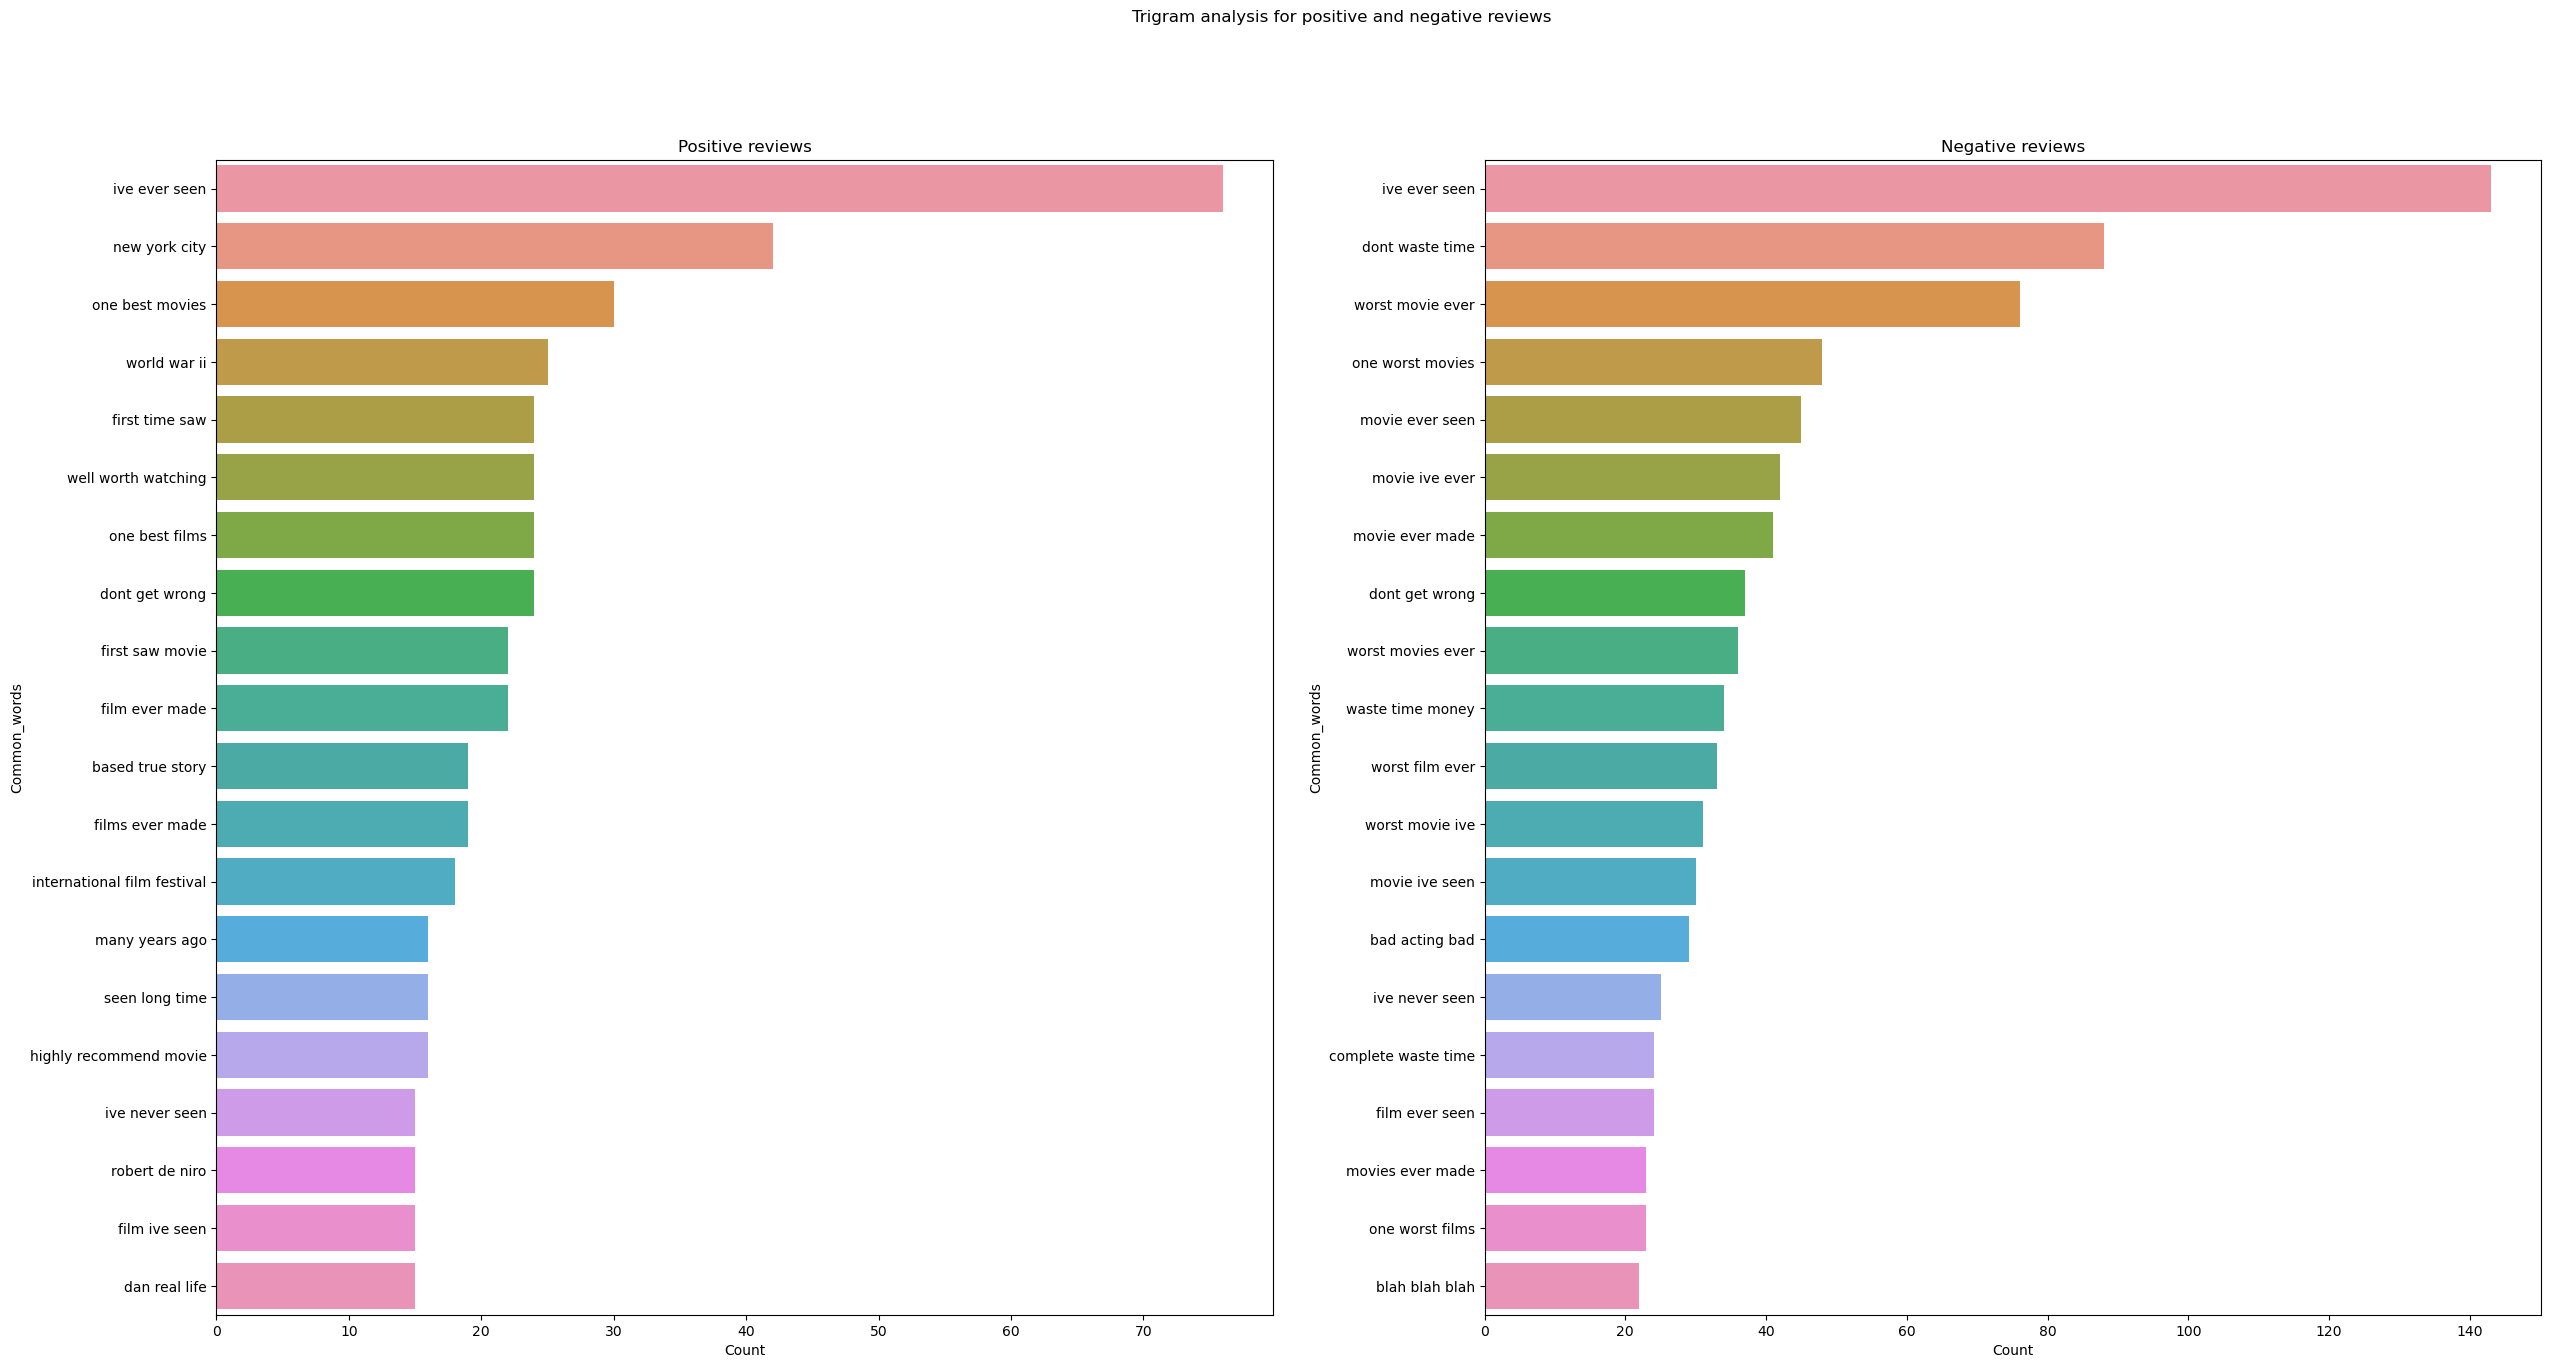

In [149]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [150]:
# Check if the stopwords, special characters, extra spaces has removed or not
# check if the data is in lowercase or not
df.review

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokmon movie cgi lo...
Name: review, Length: 9990, dtype: object

In [151]:
df

,sentiment,review
0,0,background knowledge movie bought sounded cool...
1,0,huge jane austen fan ordered movie amazonuk co...
2,0,nothing say wow anyone actually somebody sneak...
3,0,like jane austin novels love pride prejudice s...
4,0,day age incredible special movie effects one s...
...,...,...
9995,1,first saw movie back early90s first released r...
9996,1,nyc 2022 greenhouse effect vanished oceans gri...
9997,1,individuals familiar asian cinema whole aware ...
9998,1,kids aged 7 14 got huge kick film gave copy ki...


First and last five reviews of the data 

# Label Encoding

In [152]:
#unique values of labels
label_encoder = LabelEncoder()
# Fit label encoder and transform the 'category' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Split the data 

In [153]:
#split target and features 
y = df['sentiment']
X = df.review

# Predictive Modeling

## Train-test split

In [154]:
# split the feature & target in 80% train & 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992,), (1998,), (7992,), (1998,))

# Countvectorizer

In [155]:
# Feature extraction using Count Vectorizer
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [156]:
# Create a DataFrame to store the model performance metrics
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

# Logistic regression

In [157]:
# Build and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_cv, y_train)

# Make predictions and calculate accuracy for Logistic Regression
y_train_pred_lr = logistic_regression_model.predict(X_train_cv)
y_test_pred_lr = logistic_regression_model.predict(X_test_cv)

accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

results_df = results_df.append({'Model': 'Logistic Regression', 'Training Accuracy': accuracy_train_lr, 'Testing Accuracy': accuracy_test_lr}, ignore_index=True)

# Decision Tree

In [158]:
#  Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_cv, y_train)

# Make predictions and calculate accuracy for Decision Tree
y_train_pred_dt = decision_tree_model.predict(X_train_cv)
y_test_pred_dt = decision_tree_model.predict(X_test_cv)

accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

results_df = results_df.append({'Model': 'Decision Tree', 'Training Accuracy': accuracy_train_dt, 'Testing Accuracy': accuracy_test_dt}, ignore_index=True)

# Random Forest

In [159]:
# Build and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_cv, y_train)

# Make predictions and calculate accuracy for Random Forest
y_train_pred_rf = random_forest_model.predict(X_train_cv)
y_test_pred_rf = random_forest_model.predict(X_test_cv)

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

results_df = results_df.append({'Model': 'Random Forest', 'Training Accuracy': accuracy_train_rf, 'Testing Accuracy': accuracy_test_rf}, ignore_index=True)


In [160]:
results_df

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.999625,0.872372
1,Decision Tree,1.000000,0.704705
2,Random Forest,1.000000,0.846346


# TF-IDF

In [161]:
# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [162]:
# Create a DataFrame to store the model performance metrics
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

# Logistic Regression

In [163]:
# Build and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions and calculate accuracy for Logistic Regression
y_train_pred_lr = logistic_regression_model.predict(X_train_tfidf)
y_test_pred_lr = logistic_regression_model.predict(X_test_tfidf)

accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

results_df = results_df.append({'Model': 'Logistic Regression', 'Training Accuracy': accuracy_train_lr, 'Testing Accuracy': accuracy_test_lr}, ignore_index=True)

# Decision Tree

In [164]:
# Build and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_tfidf, y_train)

# Make predictions and calculate accuracy for Decision Tree
y_train_pred_dt = decision_tree_model.predict(X_train_tfidf)
y_test_pred_dt = decision_tree_model.predict(X_test_tfidf)

accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

results_df = results_df.append({'Model': 'Decision Tree', 'Training Accuracy': accuracy_train_dt, 'Testing Accuracy': accuracy_test_dt}, ignore_index=True)

# Random Forest

In [165]:
# Build and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_tfidf, y_train)

# Make predictions and calculate accuracy for Random Forest
y_train_pred_rf = random_forest_model.predict(X_train_tfidf)
y_test_pred_rf = random_forest_model.predict(X_test_tfidf)

accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

results_df = results_df.append({'Model': 'Random Forest', 'Training Accuracy': accuracy_train_rf, 'Testing Accuracy': accuracy_test_rf}, ignore_index=True)


In [166]:
results_df

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.948574,0.867367
1,Decision Tree,1.000000,0.709209
2,Random Forest,1.000000,0.845846


**Conclusion :**



The high accuracy reflects the robustness of our sentiment analysis model, demonstrating its ability to make accurate predictions on the sentiment of movie reviews within the IMDB dataset.